# Comcast Telecom Consumer Complaints

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read Comcast dataset
comcast=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
# head
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
comcast.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [5]:
#Shape
comcast.shape

(2224, 11)

In [6]:
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
comcast.nunique()

Ticket #                       2224
Customer Complaint             1841
Date                             91
Date_month_year                  91
Time                           2190
Received Via                      2
City                            928
State                            43
Zip code                       1543
Status                            4
Filing on Behalf of Someone       2
dtype: int64

In [8]:
#Create new feature Day,Month,Quarter from date
comcast["Day"]=pd.to_datetime(comcast.Date,format="%d-%m-%y").dt.day
comcast["Month"]=pd.to_datetime(comcast.Date,format="%d-%m-%y").dt.month
comcast["Quarter"]=pd.to_datetime(comcast.Date,format="%d-%m-%y").dt.quarter

In [9]:
comcast["Day"].nunique()

22

In [10]:
comcast["Month"].nunique()

12

In [11]:
#del comcast["Date_month_year"]

In [12]:
comcast.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Quarter
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,3
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,3
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,6,12,4
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,24,6,2
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,23,6,2
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,6,1,1
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,28,6,2


In [13]:
comcast.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
Day                            0
Month                          0
Quarter                        0
dtype: int64

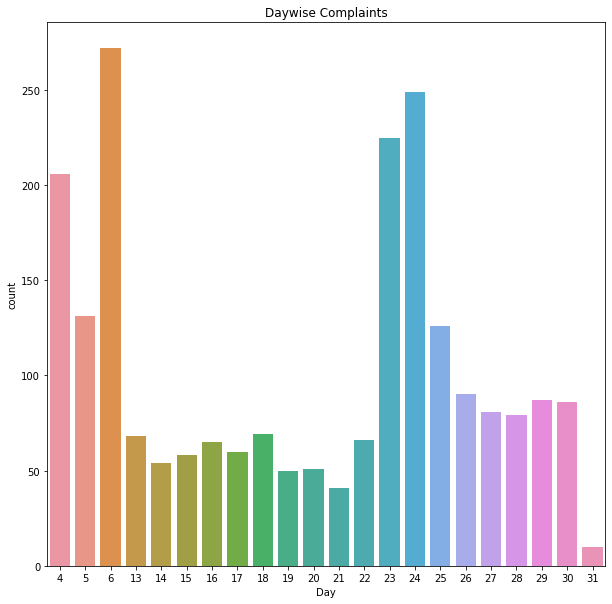

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Daywise Complaints")
sns.countplot(x="Day",data=comcast)
#Daywise complaint trend

In [15]:
month_wise=comcast.groupby("Month").size()
day_wise=comcast.groupby("Day").size()

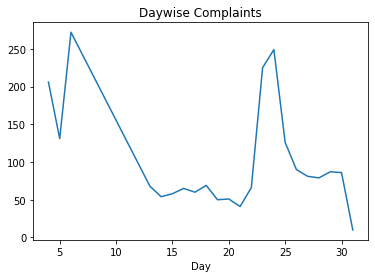

In [16]:
import matplotlib.pyplot as plt
plt.title("Daywise Complaints")
plt.xlabel("Day")
plt.plot(day_wise)
#Daywise complaint trend

Text(0.5, 0, 'Month')

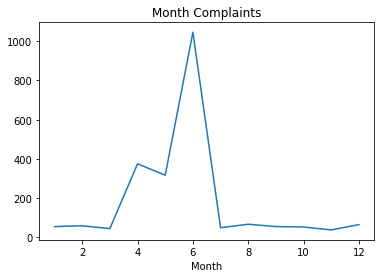

In [17]:
plt.plot(month_wise)
plt.title("Month Complaints")
plt.xlabel("Month")
#Monthwise complaint trend

In [18]:
#There more complaints in June month

In [19]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Quarter
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,3
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,3
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2


In [20]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud
complaint_types=comcast["Customer Complaint"]

In [24]:
#Determining most common used word in Complaint description
complaint_types=comcast["Customer Complaint"]

In [25]:
text=complaint_types.str.cat(sep= " ")

In [26]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

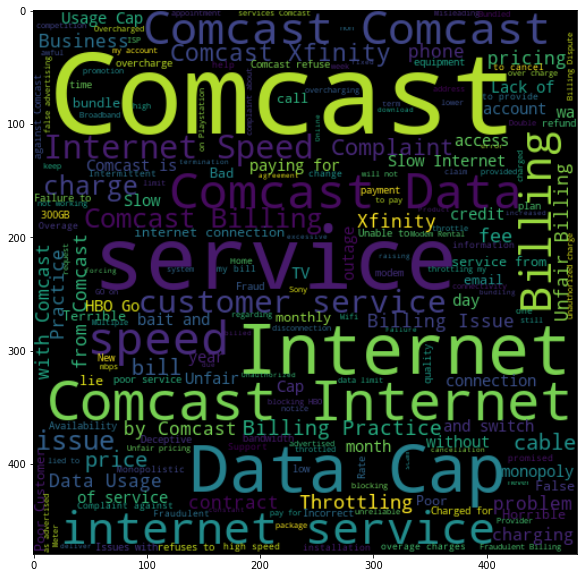

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")

In [28]:
#Removing the word comast
text=text.replace("Comcast","")

In [29]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

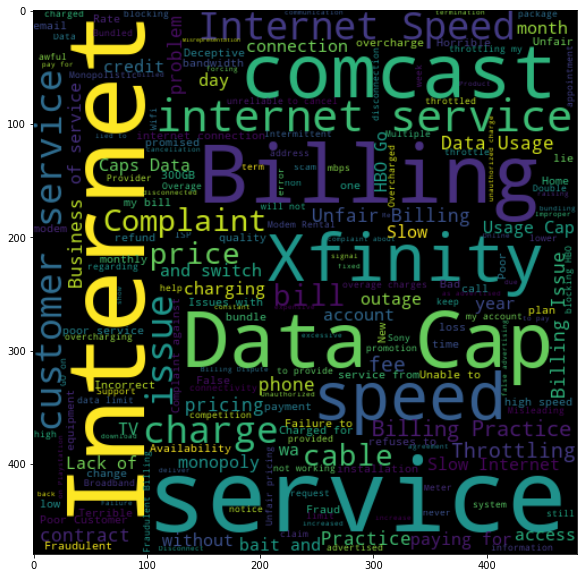

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")

In [31]:
#Based on the word cloud its evident that major complaints are Internet,Service,Data,Billing,Xfinity

In [32]:
#Creating a new feature named Complaint type
def new(x):
    if("internet" in x.casefold().split()):
        return "Internet"
    elif("service" in x.casefold().split()):
        return "Service"
    elif ("billing" in x.casefold().split()):
        return "Billing"
    elif ("data" in x.casefold().split()):
        return "Data"
    elif ("xfinity" in x.casefold().split()):
        return "Xfinity"
    else:
        return "Others"
    
comcast["Complaint_type"]=comcast["Customer Complaint"].apply(lambda x: new(x))

In [33]:
comcast["Complaint_type"]

0       Internet
1        Service
2        Service
3         Others
4        Service
          ...   
2219     Service
2220     Billing
2221      Others
2222      Others
2223    Internet
Name: Complaint_type, Length: 2224, dtype: object

In [34]:
comcast["Complaint_type"].value_counts()
#Frequency of complaint types

Others      985
Internet    505
Service     294
Billing     209
Data        195
Xfinity      36
Name: Complaint_type, dtype: int64

Text(0.5, 0, 'Complaint')

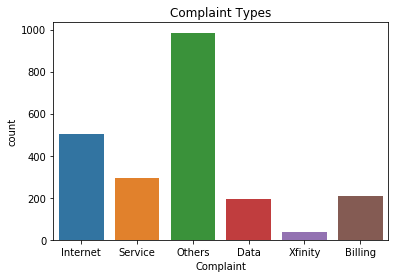

In [35]:
#Plotting Frequency of complaint types
sns.countplot(comcast["Complaint_type"])
plt.title("Complaint Types")
plt.xlabel("Complaint")

In [36]:
#Major complaint type is Internet

In [37]:
# Creating a new feature with categories as "Open" and "Closed" based on status
def status(row):
    if (row.Status == "Open") |(row.Status == "Pending") :
        return "Open"
    else:
        return "Closed"
    
comcast["Status_new"]=comcast.apply(status,axis="columns")

#New Categorical variable "Status new created"

In [38]:
comcast.loc[comcast["Quarter"]==3]

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Quarter,Complaint_type,Status_new
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,3,Service,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,3,Others,Open
20,327657,Internet out all the time but they have a mono...,06-07-15,06-Jul-15,8:55:43 PM,Customer Care Call,Alexandria,Virginia,22305,Solved,No,6,7,3,Internet,Closed
21,328742,horrible cable service and customer service,06-08-15,06-Aug-15,3:18:58 PM,Internet,Alexandria,Virginia,22312,Solved,No,6,8,3,Service,Closed
22,328165,Speed,06-08-15,06-Aug-15,12:03:37 PM,Customer Care Call,Alexandria,Virginia,22304,Solved,No,6,8,3,Others,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,222759,monopolistic billing practices,04-07-15,04-Jul-15,6:57:54 PM,Customer Care Call,Winnetka,Illinois,60093,Closed,No,4,7,3,Billing,Closed
2203,329247,Inconsistent and Intermittent Internet Connect...,06-08-15,06-Aug-15,6:17:50 PM,Internet,Woodstock,Georgia,30188,Solved,No,6,8,3,Internet,Closed
2209,279410,False Advertising/Bait and switch,05-07-15,05-Jul-15,9:47:36 PM,Customer Care Call,Worth,Illinois,60482,Solved,No,5,7,3,Others,Closed
2211,221763,Comcast,04-07-15,04-Jul-15,1:49:52 PM,Internet,Wyoming,Michigan,49509,Closed,No,4,7,3,Others,Closed


In [39]:

statewise_Q3=comcast.loc[comcast["Quarter"]==3].groupby(["State","Status_new"]).size().unstack().fillna(0)



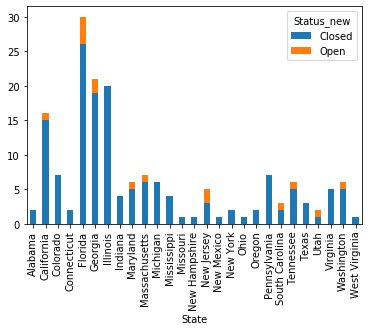

In [42]:
#Statwise Stacked bar chart on status for Quarter3
plt.figure(figsize=(10,10))
%matplotlib inline
statewise_Q3.plot(kind="bar",stacked=True)


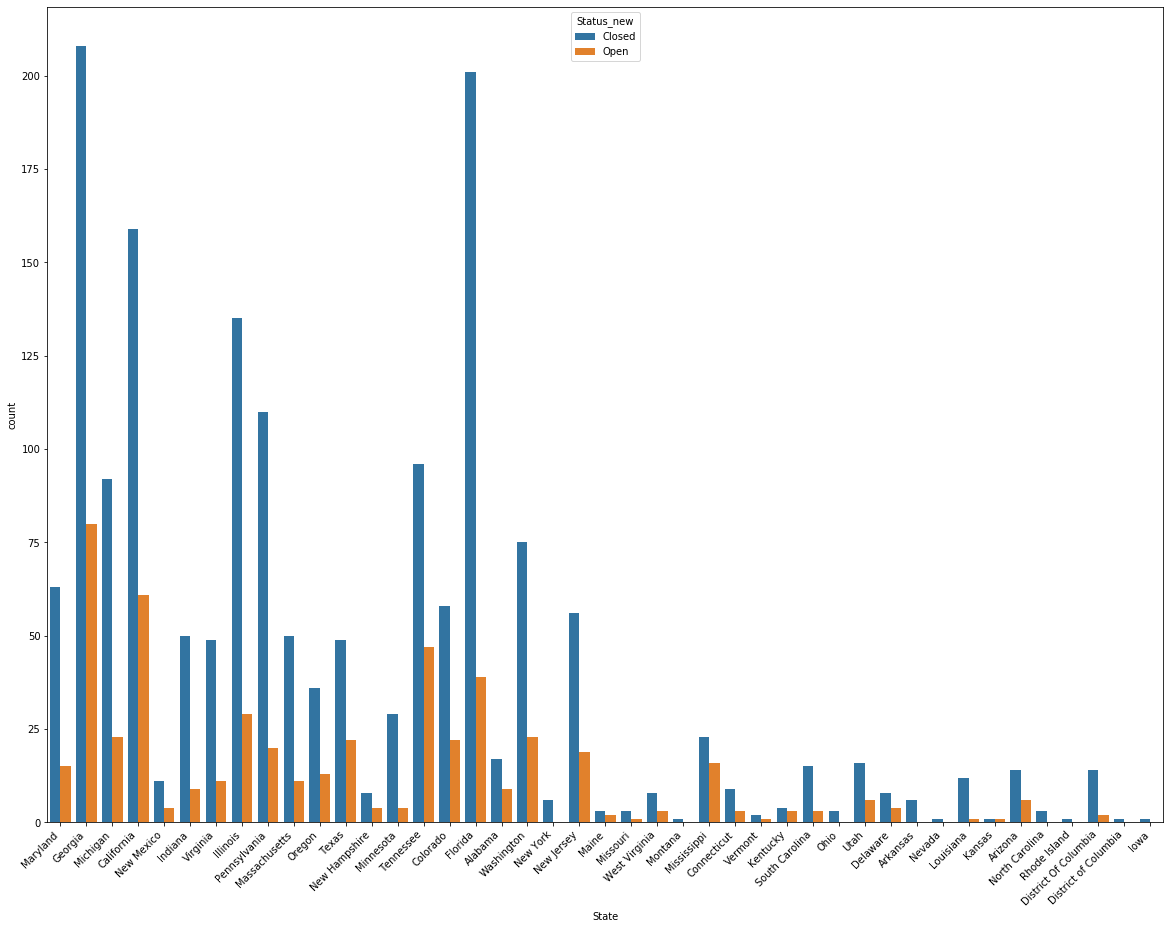

In [41]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45,horizontalalignment="right")
sns.countplot(x="State",hue="Status_new",data=comcast)
#Side by side bar chart

In [ ]:
#Statewise status for Quarter3 table
statewise_Q3

In [ ]:
#Statewise complaints plot
comcast.groupby(["State"]).size().sort_values(ascending = False).plot()

In [ ]:
# From the chart and Table its evident that Georgia has Maximum compalints

In [ ]:
#Statewise complaints
statewise=comcast.groupby(["State","Status_new"]).size().unstack()

In [ ]:
statewise.head(2)

In [ ]:
#Statewise Total complaints
statewise["Total"]=statewise["Closed"]+statewise["Open"]
statewise.head()

In [ ]:
#Statewise Total Unresolved complaints percentage
statewise["Unresolved_percentage"]=(statewise["Open"]/statewise["Total"])*100
statewise.head()

In [ ]:
statewise.sort_values("Unresolved_percentage",ascending=False).dropna()

In [ ]:
statewise.iloc[statewise["Unresolved_percentage"].argmax()]
# Kansas has highest unresolved percentage of 50%

In [ ]:
statewise["Resolved_percentage"]=(statewise["Closed"]/statewise["Total"])*100
statewise.sort_values("Resolved_percentage",ascending=False).dropna()
# Louisiana has highest no of resolved percentage

In [ ]:
Recieved_status=comcast.groupby(["Received Via","Status_new"]).size().unstack()

In [ ]:
#Complaints resolved status for different mode of communication
Recieved_status["Total"]=Recieved_status["Closed"]+Recieved_status["Open"]
Recieved_status

In [ ]:
#Complaints resolved precentage for different mode of communication
Recieved_status["Resolved_Percentege"]=(Recieved_status["Closed"]/Recieved_status["Total"])*100
Recieved_status

In [ ]:
#From the table its clear that complaints receivied via Customer Care call are resolved more